In [1]:
import pandas as pd
import numpy as np
import pdb, argparse
import os, pdb, math, itertools
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
from kdutils.macro2 import *

In [3]:
method = 'cicso0'
instruments = 'ims'
period = 5

In [4]:
dirs = os.path.join(base_path, method, instruments, 'temp', "tree",
                        str(period))

In [5]:
filename = os.path.join(dirs, "predict_data.feather")

In [6]:
predict_data = pd.read_feather(filename)
predict_data#.head()

,trade_time,code,nxt1_ret_5h,predict
0,2024-12-05 10:20:00,IM,-0.001860,-0.000092
1,2024-12-05 10:21:00,IM,-0.000716,-0.000094
2,2024-12-05 10:22:00,IM,-0.001164,-0.000065
3,2024-12-05 10:23:00,IM,-0.000192,-0.000027
4,2024-12-05 10:24:00,IM,-0.000006,-0.000035
...,...,...,...,...
14730,2025-03-12 14:56:00,IM,-0.000430,-0.000065
14731,2025-03-12 14:57:00,IM,-0.000962,-0.000072
14732,2025-03-12 14:58:00,IM,-0.001057,-0.000071
14733,2025-03-12 14:59:00,IM,-0.002541,-0.000065


In [7]:
from lib.cux001 import FactorEvaluate1

In [8]:
evaluate1 = FactorEvaluate1(factor_data=predict_data,
                                factor_name='predict',
                                ret_name='nxt1_ret_{0}h'.format(period),
                                roll_win=240,
                                fee=0.000,
                                scale_method='roll_zscore',
                                expression='weight')

In [9]:
stats_dt = evaluate1.run()

In [10]:
stats_dt

{'total_ret': 0.12114240285146516,
 'avg_ret': 8.123665462898944e-06,
 'max_dd': -0.09539976059400668,
 'calmar': 1.2698396945356247,
 'sharpe1': 0.011852615064161734,
 'sharpe2': 1.9457357695868105,
 'turnover': 0.24186479771640543,
 'win_rate': 0.4897862232779097,
 'profit_ratio': 1.037456829698118,
 'ic_mean': 0.015199944604596243,
 'ic_std': 0.08057937060329108,
 'ic_ir': 0.18863320091476907,
 'factor_autocorr': 0.4399606185340238,
 'ret_autocorr': 0.8137505248977096}

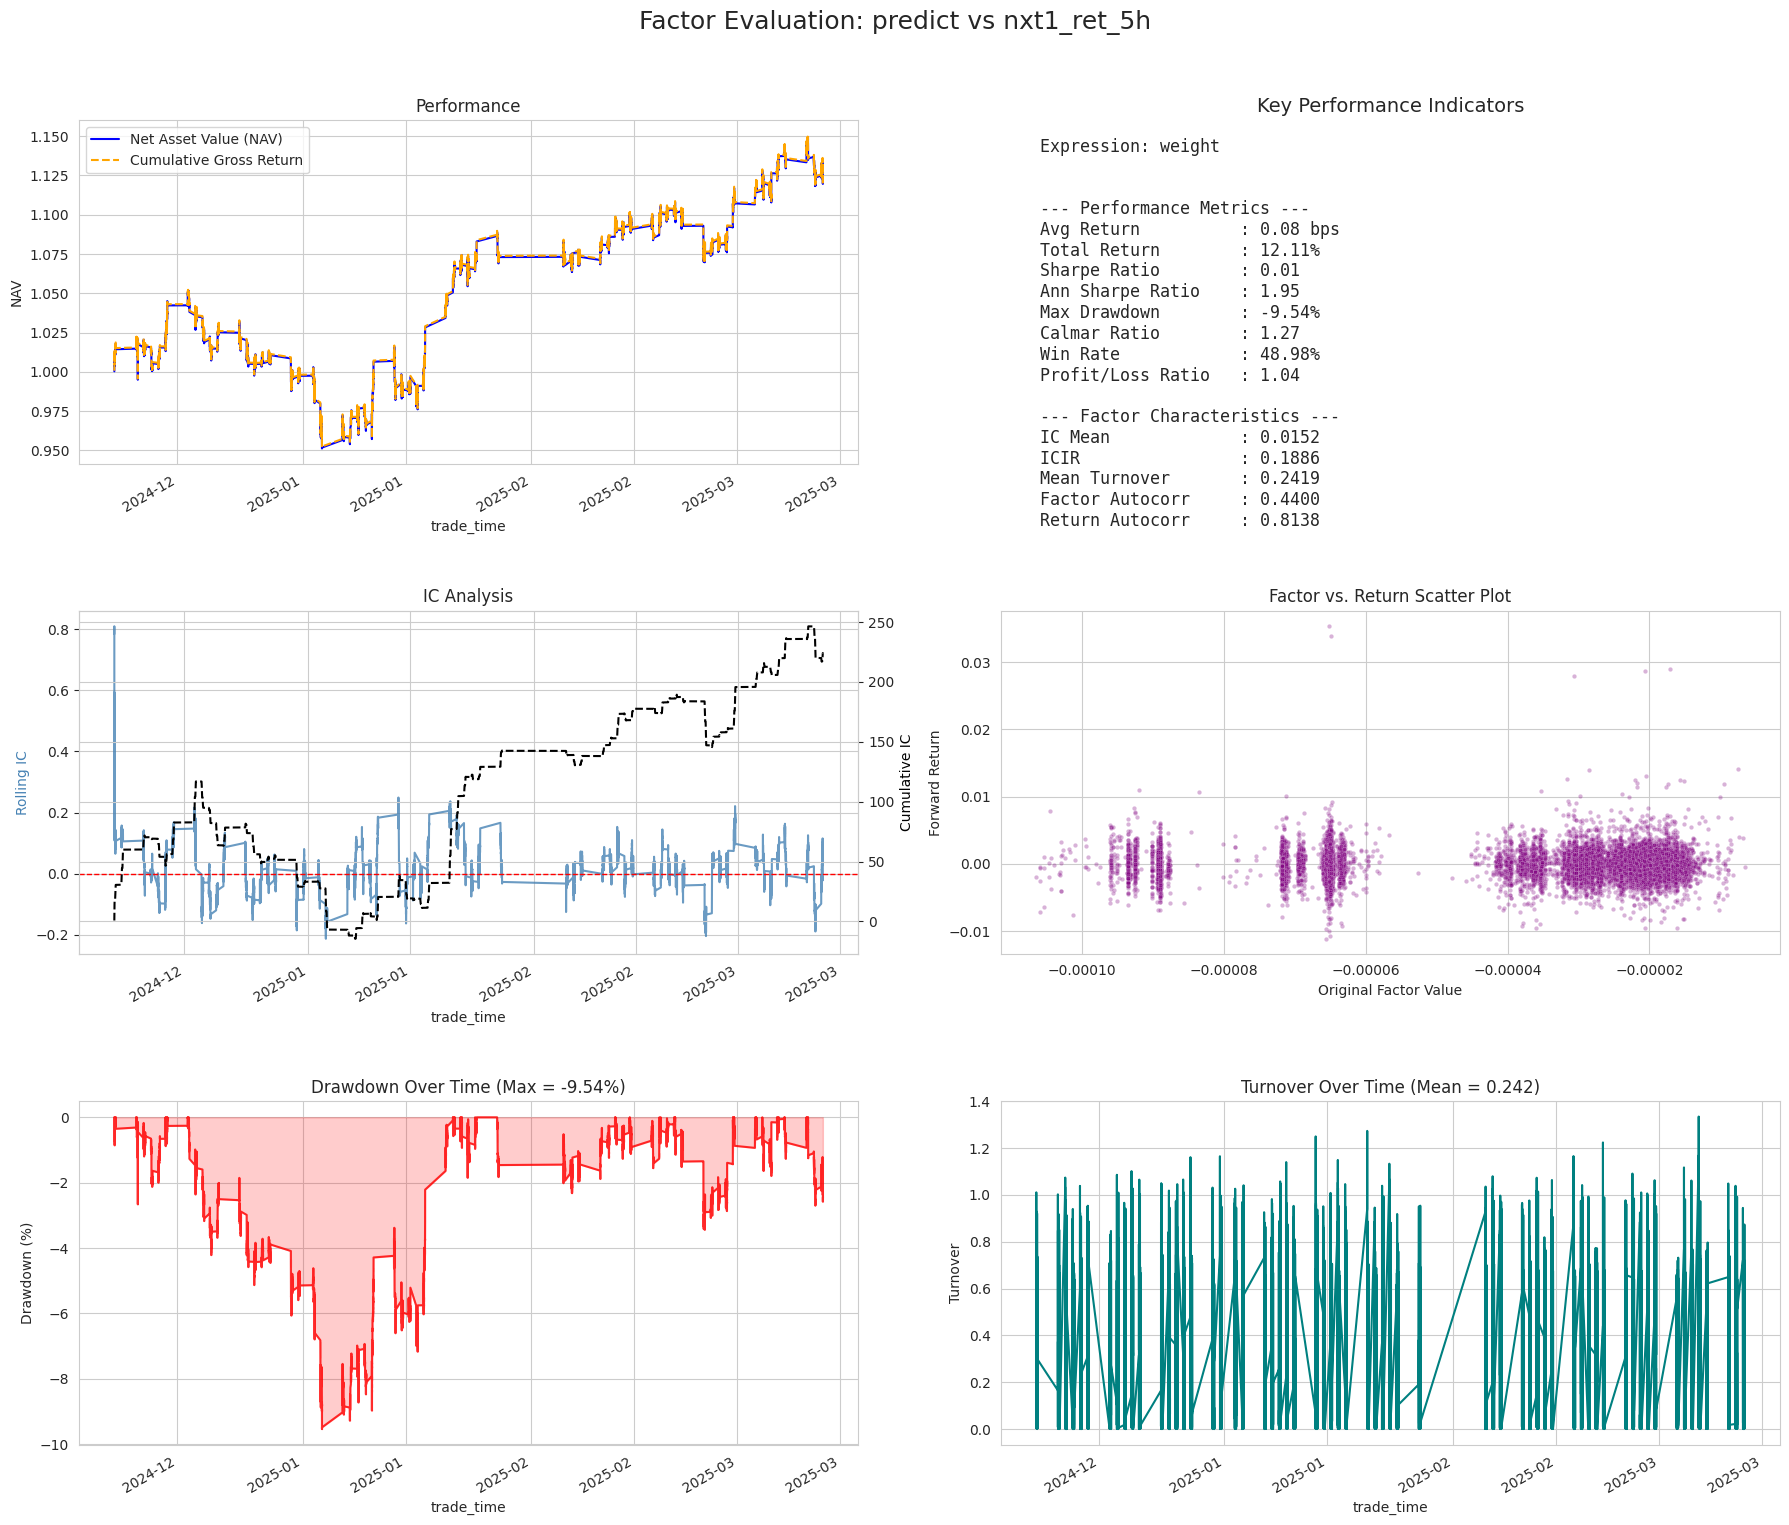

In [11]:
evaluate1.plot_results()

In [16]:
evaluate1.factor_data['cumsum_ic']#.plot(figsize=(14,7))

trade_time
2024-12-05 10:20:00           NaN
2024-12-05 10:21:00           NaN
2024-12-05 10:22:00           NaN
2024-12-05 10:23:00           NaN
2024-12-05 10:24:00      0.783750
                          ...    
2025-03-12 14:56:00    223.961464
2025-03-12 14:57:00    223.943433
2025-03-12 14:58:00    223.929437
2025-03-12 14:59:00    223.921492
2025-03-12 15:00:00    223.910384
Name: cumsum_ic, Length: 14735, dtype: float64

<Axes: xlabel='trade_time'>

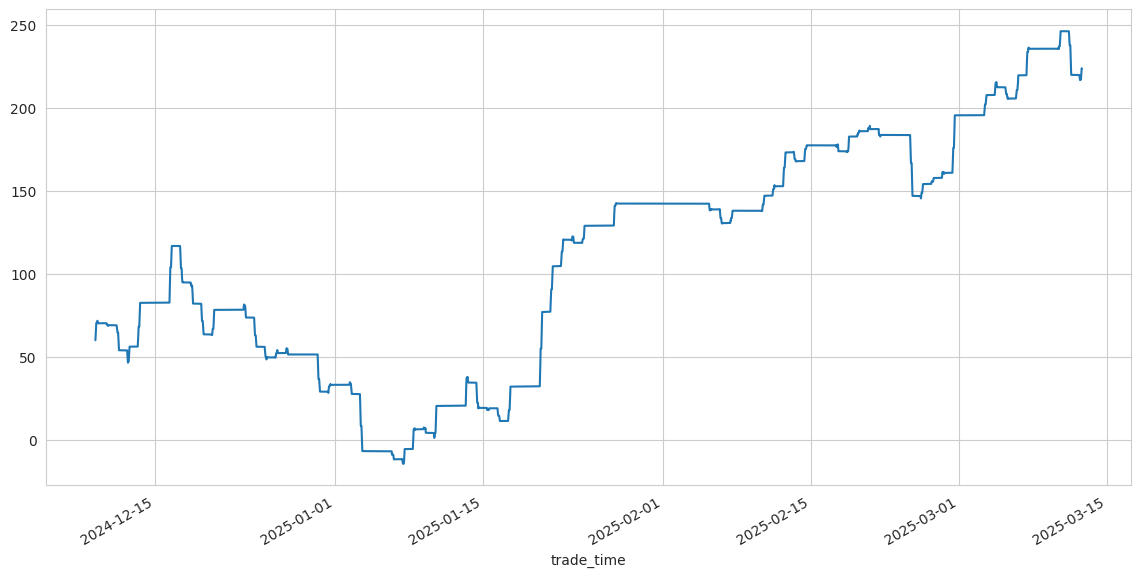

In [32]:
evaluate1.factor_data['cumsum_ic'].loc['2024-12-07 11:00:00':].plot(figsize=(14,7))